<h1 align="center" style="color:red;">NEUROLIB fLDS DEMONSTRATION</h1> 

In this notebook the `neurolib` implementation of fLDS is illustrated.

In [1]:
from IPython.display import HTML
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
import pickle
import os
path = '/'.join(os.getcwd().split('/')[:-2])
sys.path.append(path)

To start, import from the neurolib the desired model

In [3]:
from neurolib.models.flds import fLDS

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Preparing a dataset for neurolib-fLDS training

The analysis in this tutorial is run on a synthetic dataset of 80 trials, each consisting of 30-step sequences of 20D observations. This dataset was generated 'on top' of a 2D state space, evolving following a nonlinear law. In this tutorial the neurolib-fLDS implementation will be used to ascertain what can be expected of fLDS when handling a nonlinear dataset.

In [4]:
fname = 'datadict_gaussianobs2D'
with open(fname, 'rb') as f:
  datadict = pickle.load(f)

In [5]:
datadict.keys()

dict_keys(['Xtrain', 'Ytrain', 'Xvalid', 'Yvalid', 'Ytest', 'Xtest'])

In order for a `neurolib` **model** to use a dataset - whether for training or analysis - the dataset must be a python `dict` with specific keys corresponding to the Model nodes. For fLDS training, the neurolib requires the user to provide training and validation data with keys `train_Observation` and `valid_Observation` respectively.

The keys in the `'datadict_gaussianobs2D'` dataset just loaded however are not adapted to the neurolib. This is fixed in the following cell.

In [6]:
dataset = {}
Ytrain = datadict['Ytrain']
Yshape = Ytrain.shape
print("Yshape", Yshape)
dataset['train_Observation'] = Ytrain
dataset['valid_Observation'] = datadict['Yvalid']

Yshape (80, 30, 20)


## Instantiating the fLDS Model class

In [7]:
max_steps, input_dim = Yshape[-2], Yshape[-1]
flds = fLDS(main_input_dim=input_dim,
            state_dim=[[2]],
            max_steps=max_steps,
            save_on_valid_improvement=True)

ds_inputs ['LDS']
Building all outputs,  LDS
	Building A,  LDS
	Building loc,  LDS
	Building prec, scale,  LDS
	Building main,  LDS
Building all outputs,  Recognition
	Building loc,  Recognition
	Building prec,  Recognition
	Building main,  Recognition
Building all outputs,  Posterior
	Building invscale, Posterior
	Building loc, Posterior
	Building main, Posterior
Building all outputs,  Generative
	Building loc,  Generative


/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)


	Building prec,  Generative
	Building main,  Generative
	Building loc,  Generative
		Updating defaults, Generative with ['imain0']
Building entropy,  Posterior


/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)
/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  return _inspect.getargspec(target)


Building logprob,  Generative
Building logprob,  LDS
	Building loc,  LDS
		Updating defaults with ['imain0'] , LDS

Scope: fLDS
     0 fLDS/Prior_loc/loc:0 [2]
     1 fLDS/Prior_scale/scale:0 [2, 2]
     2 fLDS/LDS_A/A:0 [2, 2]
     3 fLDS/LDS_prec/eye_init:0 [2, 2]
     4 fLDS/Recognition_loc/fully_connected/weights:0 [20, 64]
     5 fLDS/Recognition_loc/fully_connected/biases:0 [64]
     6 fLDS/Recognition_loc/fully_connected_1/weights:0 [64, 64]
     7 fLDS/Recognition_loc/fully_connected_1/biases:0 [64]
     8 fLDS/Recognition_loc/fully_connected_2/weights:0 [64, 2]
     9 fLDS/Recognition_loc/fully_connected_2/biases:0 [2]
     10 fLDS/Recognition_precision/fully_connected/weights:0 [20, 64]
     11 fLDS/Recognition_precision/fully_connected/biases:0 [64]
     12 fLDS/Recognition_precision/fully_connected_1/weights:0 [64, 64]
     13 fLDS/Recognition_precision/fully_connected_1/biases:0 [64]
     14 fLDS/Recognition_precision/fully_connected_2/weights:0 [64, 4]
     15 fLDS/Recogn

In [8]:
flds.train(dataset, num_epochs=20)

Saving in rslts/fLDS/D190226_1144/
time: 2.2384331226348877
ep, cost: 0, 1176.481742938847
Valid. cost: 1246.2536905784673 ... Saving...

time: 1.9569251537322998
ep, cost: 1, 291.5144643115002
Valid. cost: 226.15450833068417 ... Saving...

time: 2.01364803314209
ep, cost: 2, 0.0646641659904617
Valid. cost: -53.82035120419941 ... Saving...

time: 1.9318039417266846
ep, cost: 3, -116.40902282269845
Valid. cost: -181.7268347138982 ... Saving...

time: 1.942246913909912
ep, cost: 4, -188.6033409036068
Valid. cost: -263.3232974811724 ... Saving...

time: 1.9760410785675049
ep, cost: 5, -186.83689676169382
time: 1.8943569660186768
ep, cost: 6, -243.61920476008322
Valid. cost: -293.5567688507608 ... Saving...

time: 1.8931529521942139
ep, cost: 7, -269.12335795917045
Valid. cost: -313.1858966019893 ... Saving...

time: 2.098104953765869
ep, cost: 8, -259.7874774190465
time: 1.9307079315185547
ep, cost: 9, -281.2986228641702
Valid. cost: -325.3158215781485 ... Saving...

time: 1.8952851295471

## Analysis

Names available for evaluation are listed when a Model is **built** or **restored**. For example, the dynamics matrix $A$ found by fLDS can be immediately evaluated.

In [9]:
flds.eval(dataset, 'LDS:A', key='valid')

array([[ 1.00845828, -0.01202069],
       [-0.01173939,  1.00306022]])

The inferred state-space paths are also immediately available for evaluation from the name `'Posterior:loc'`. Let us plot then and see what fLDS has found.

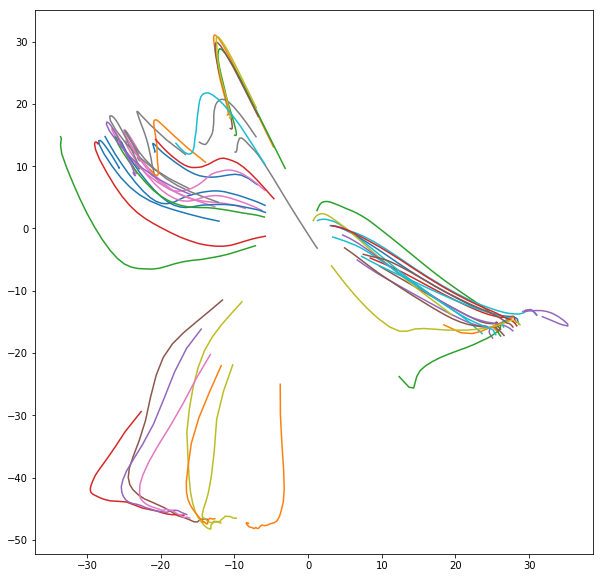

In [10]:
X = flds.eval(dataset, 'Posterior:loc', key='train')
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
for i in range(0, 50):
    ax1.plot(X[i,:,1], X[i,:,0])

The fLDS representation appears to show some fixed points, a feature that points to an underlying nonlinear dynamics. We don't expect a Linear Dynamical System to provide an accurate description of the evolution in this case. But fLDS still does well in representing the paths.

Another thing that is suggested by these paths is that the underlying dynamics is indeed 2D. This is because 2D space is topologically "tight" for 1D paths. Hence, if the true dynamics was higher than 2D, one would expect paths to intertwine in a 2D representation of it.

For convenience, fLDS models are also endowed with a method `eval_posterior` that returns the inferred paths

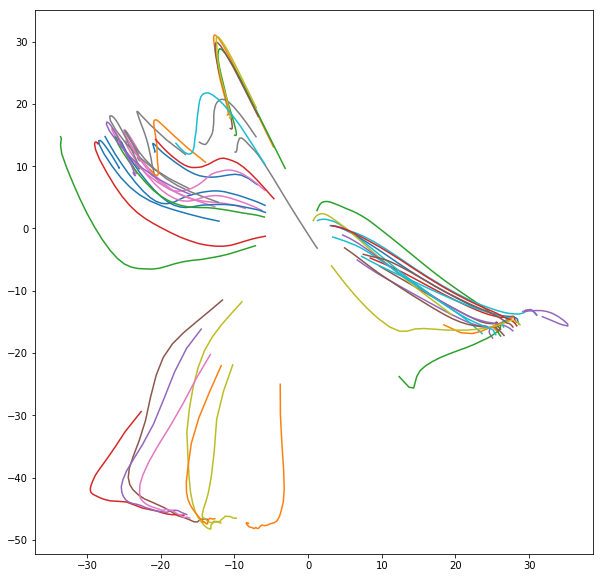

In [11]:
X = flds.eval_posterior(dataset, key='train')
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
for i in range(0, 50):
    ax1.plot(X[i,:,1], X[i,:,0])

Due to its nonlinear evolution, we do *not* expect the trained fLDS's dynamics to interpolate well this dataset. To test this, it is possible to compute the $kR^2$ on validation data by calling directly the `anal_kR2$ method.

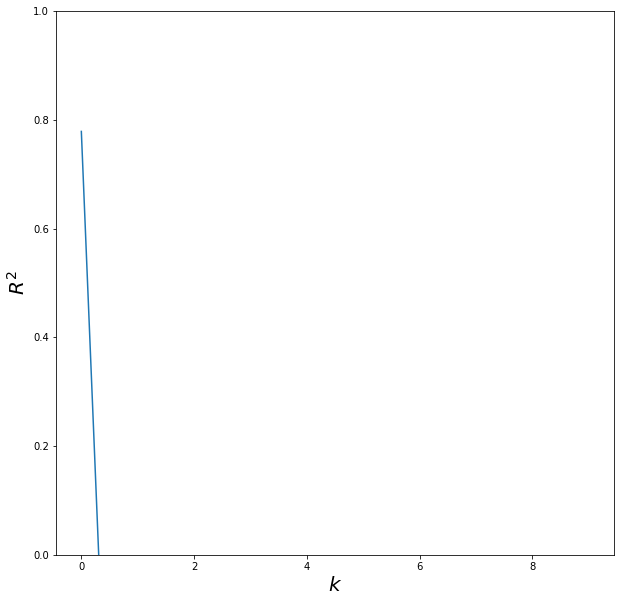

In [15]:
kR2 = flds.anal_kR2(dataset, key='valid')
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$k$', fontsize=20)
ax1.set_ylabel(r'$R^2$', fontsize=20)
ax1.set_ylim(ymin=0.0, ymax=1.0)
ax1.plot(kR2)